![example](images/director_shot.jpeg)

# Analysis of Profitable Movies Released between 2010 and 2018
***
**Author:** Brent Smart
***

## Overview
***

This project analyzes profitable movies released between 2010 and 2018 in order to make recommendations to Microsoft as it enters the movie production industry. This analysis uses data from multiple datasets and only contains records of complete and relevant data. It also uses the additional data that was calculated using the complete dataset. The data analysis shows common trends among movies that share at least one of the following genres: Sci-Fi, Animation, and Adventure. Not only were movies of these types more profitable than other combinations of genres, they also generated about 60% of their revenue internationally. Animation movies also over the least competition of the three, ranking 12th out of 22 genres produced (Sci-Fi and Adventure rank 14th and 18th respectively). Given their top performance, it may be helpful for Microsoft to consider focusing on these genres and markets as they enter the movie production industry.  

## Business Problem
***
This data analysis aims to answer questions about the budget, genre types, and markets of profitable movies released between 2010-2018. Focusing on the profitable movies may assist Microsoft in initializing its entry into the movie production industry.

## Data Understanding
***
This analysis focuses on top performing movies from 2010-2018. Top performing movies have the highest average ratings and profits. This data uses the public online movie datasets from IMDb, The-Numbers.com, and Box Office Mojo. Each data set provides information essential to answering the questions in this data analysis. Such categories include information on movie titles, genres, lengths, ratings, release year, studios, budgets, profits, and much more.  

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string 

%matplotlib inline

Above shows essential libraries that this data analysis utilizes to clean, analyze, and calculate the data needed for this analysis. Below explains how each is used in this data analysis:
1.  **pandas** - used for the creation of main and subsequent dataframes.
2.  **matplot & seaborn** - used for plotting data.
3.  **string** - used to help clean data from datasets.

In [3]:
# # Importing data from different datasets.
df_basics = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz').drop(['original_title'], axis=1)
df_gross = pd.read_csv('data/zippedData/bom.movie_gross.csv.gz')
df_budgets = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz').drop(['id'], axis=1)
df_ratings = pd.read_csv('data/zippedData/imdb.title.ratings.csv.gz')

Above, each dataset is loaded into individual dataframes (*df_basics, df_gross, etc*). 

The next cell displays a summary and description of their contents. This helps to show the scope of data as well as pinpoint the completeness of the data. This information is helpful in preparing the data for cleaning and analysis. The information below shows that each dataset contains different amounts of data.

In [7]:
# # Check contents of imported data
df_gross.info  
df_budgets.info()
df_ratings.info() 
df_basics.info()

# # Finding max and min of budget, years, and ratings 
df_budgets.production_budget.describe() #max: 99 million, min: 1 million
df_basics.start_year.describe() #max: 2115, min: 2010
df_gross.year.describe() #max: 2018, min: 2010
df_ratings.averagerating.describe() #max: 10.0, min:1.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 226.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 5 columns):
 #   Column           N

count    73856.000000
mean         6.332729
std          1.474978
min          1.000000
25%          5.500000
50%          6.500000
75%          7.400000
max         10.000000
Name: averagerating, dtype: float64

Below is a preview of what the dataframe looks like before cleaning.

In [6]:
df_gross.head(5)
df_budgets.head(5)
df_ratings.head(5)
df_basics.head(5)

,tconst,primary_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy"


## Data Preparation
***

The data analysis uses and combines data from multiple databases. Punctuation can cause errors and duplicates when joining and so the punctuation and special characters were removed from the movie title, gross, and studio information. The genre data is consistent across each dataset and is not cleaned. Since this analysis aims to answer questions about genre, revenue, and markets, any related data is included. Likewise, irrelevant variables are excluded. Additionally, in order to ensure the validity of the analysis the data only contains complete records. Entries with missing data are excluded. 

In [ ]:
# # Cleaning punctuation from data
punct = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{}~'
transtab = str.maketrans(dict.fromkeys(punct,''))

# Removed characters and turned all strings to lower case.
df_basics.primary_title = df_basics.primary_title.apply(lambda x: x.lower())
df_basics.primary_title = '|'.join(df_basics.primary_title.tolist()).translate(transtab).split('|')

df_gross.title = df_gross.title.apply(lambda x: x.lower())
df_gross.title = '|'.join(df_gross.title.tolist()).translate(transtab).split('|')
df_gross.studio = df_gross.studio.astype(str)
df_gross.studio = df_gross.studio.apply(lambda x: x.lower())
df_gross.studio = '|'.join(df_gross.studio.tolist()).translate(transtab).split('|')

df_budgets.movie = df_budgets.movie.apply(lambda x: x.lower())
df_budgets.movie = '|'.join(df_budgets.movie.tolist()).translate(transtab).split('|')

df_budgets.production_budget = df_budgets.production_budget.str.replace('$','')
df_budgets.production_budget = df_budgets.production_budget.str.replace(',','')

df_budgets.worldwide_gross = df_budgets.worldwide_gross.str.replace('$','')
df_budgets.worldwide_gross = df_budgets.worldwide_gross.str.replace(',','')

df_budgets.domestic_gross = df_budgets.domestic_gross.str.replace('$','')
df_budgets.domestic_gross = df_budgets.domestic_gross.str.replace(',','')


# Assigned appropriate astypes
df_budgets.release_date = pd.to_datetime(df_budgets['release_date'])
df_budgets.release_date = df_budgets.release_date.dt.year
df_budgets.production_budget = df_budgets.production_budget.astype(float)
df_budgets.worldwide_gross = df_budgets.worldwide_gross.astype(float)
df_budgets.domestic_gross = df_budgets.domestic_gross.astype(float)
df_budgets

# Divided and rounded gross information by million to aid readibility
df_budgets.production_budget = round(df_budgets.production_budget/1000000, 2)
df_budgets.worldwide_gross = round(df_budgets.worldwide_gross/1000000, 2)
df_budgets.domestic_gross = round(df_budgets.domestic_gross/1000000, 2)

The cell below shows an example of what the data looks like after cleaning characters. The cell after that begins the data cleaning process by filtering.

In [32]:
df_gross.head()
df_budgets.head()
df_ratings.head()
df_basics.head()

,tconst,primary_title,start_year,runtime_minutes,genres
0,tt0063540,sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,one day before the rainy season,2019,114.0,"Biography,Drama"
2,tt0069049,the other side of the wind,2018,122.0,Drama
3,tt0069204,sabse bada sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,the wandering soap opera,2017,80.0,"Comedy,Drama,Fantasy"


The cell below continues the cleaning process by filtering. The cell also shows the calculation of profit and market percentage of revenue variables, both of which are used in the creation of main dataframe.

In [31]:
# # Created main df using common items in each dataframe and merged two at a time.
df_1 = pd.merge(df_basics, df_gross, left_on='primary_title', right_on='title', how='inner')
df_2 = pd.merge(df_1, df_budgets, left_on='primary_title', right_on='movie', how='inner')
df_3 = pd.merge(df_2, df_ratings, on='tconst', how='inner')

# Created profit and foreign_gross variable using most complete data
df_3['total_profits_millions'] = round(df_3['worldwide_gross'] 
                                             - df_3['production_budget'], 2)
df_3['foreign_gross_millions'] = round(df_3['worldwide_gross'] 
                                             - df_3['domestic_gross_y'], 2)

df_3['foreign_percent_millions'] = (round(df_3['foreign_gross_millions']
                                         /df_3['worldwide_gross'], 2))*100

df_3['domestic_percent_millions'] = round(df_3['domestic_gross_y']
                                         /df_3['worldwide_gross'], 2)*100
# # Cleaned database by filtering and by dropping records w/ duplicates & missing data.
# Used production_time_years to identify and remove duplicate rows.

df_3 = df_3.loc[(df_3['year'] >= 2010) 
                & (df_3['year'] <= 2018) 
                & (df_3['averagerating'] >= 5) 
                & (df_3['total_profits_millions'] >= 0)].sort_values(
                by=['total_profits_millions', 'averagerating'], ascending=False)
                 
df_3.drop_duplicates(subset=['movie', 'release_date'], keep='first', inplace=True, )
cols_to_drop = ['tconst', 'primary_title', 'title', 'domestic_gross_x', 'foreign_gross', 'title', 
                'year', 'start_year', 'numvotes']
df_3.drop(cols_to_drop, axis=1, inplace=True)
df_3.reset_index(drop=True, inplace=True)
df_3 = df_3.dropna()
df = df_3.reindex(columns=['movie','studio','genres', 'runtime_minutes','production_budget',
                           'domestic_gross_y', 'foreign_gross_millions',
                           'domestic_percent_millions','foreign_percent_millions',
                           'worldwide_gross', 'total_profits_millions', 'averagerating'])
df.head()


,movie,studio,genres,runtime_minutes,production_budget,domestic_gross_y,foreign_gross_millions,domestic_percent_millions,foreign_percent_millions,worldwide_gross,total_profits_millions,averagerating
0,avengers infinity war,bv,"Action,Adventure,Sci-Fi",149.0,300.0,678.82,1369.31,33.0,67.0,2048.13,1748.13,8.5
1,jurassic world,uni,"Action,Adventure,Sci-Fi",124.0,215.0,652.27,996.58,40.0,60.0,1648.85,1433.85,7.0
2,furious 7,uni,"Action,Crime,Thriller",137.0,190.0,353.01,1165.71,23.0,77.0,1518.72,1328.72,7.2
3,black panther,bv,"Action,Adventure,Sci-Fi",134.0,200.0,700.06,648.20,52.0,48.0,1348.26,1148.26,7.3
4,jurassic world fallen kingdom,uni,"Action,Adventure,Sci-Fi",128.0,170.0,417.72,888.05,32.0,68.0,1305.77,1135.77,6.2


The cell with the dataframe above shows that most movies have more than one genre. This isolates too many movies into its separate genre category. To help with analysis it is helpful that each movie has only a unique genre. The cell below distributes each genre to that movie title. Subsequent dataframes account for those potential duplicates this method may cause. After each line of code, that specific dataframe is called for verification.

In [29]:
# Spliting multi-genred movies into single-genred movies.
s = (df.genres.str.split(',', expand=True).stack().to_frame(name='genres'))
s.index = s.index.droplevel(-1)
del df['genres']

df_split_genres = df.join(s)

# What is the average budget of movies released between 2010 and 2018 by genre?
df_genre_mean_prod_sort = df_split_genres.groupby(['genres']
                                                 ).mean().round(2
                                                               ).sort_values('production_budget').reset_index()
df_genre_budget = df_genre_mean_prod_sort[['genres','production_budget']]
df_genre_budget

# Which movie genres are most common? 
df_genre_count = df_split_genres.groupby(['genres']
                                        ).size().to_frame('count').sort_values(by='count').reset_index()

# Which movie genres are most profitable?
df_genre_mean_prof = df_split_genres.groupby(['genres']
                                                 ).mean().round(2).sort_values('total_profits_millions'
                                                                              ).reset_index()
df_genre_profits = df_genre_mean_prof[['genres','total_profits_millions']]
df_genre_profits

# Which movie genres generated the most income in domestic and foreign markets?
#foreign
df_genre_mean_foreign_sort = df_split_genres.groupby(['genres']
                                                    ).mean().round(2
                                                                  ).sort_values('foreign_gross_millions'
                                                                               ).reset_index()
df_genre_avg_foreign = df_genre_mean_foreign_sort[['genres','foreign_gross_millions']]
df_genre_avg_foreign

#domestic
df_genre_mean_domes_sort = df_split_genres.groupby(['genres']
                                                  ).mean().round(2
                                                                ).sort_values('domestic_gross_y'
                                                                             ).reset_index()
df_genre_avg_domestic = df_genre_mean_domes_sort[['genres','domestic_gross_y']]
df_genre_avg_domestic

# What percentage of revenue was generated in foreign and domestic markets?
#domestic
df_genre_dom = df_split_genres.groupby(['genres']
                                                ).mean().round(2
                                                                ).sort_values('domestic_percent_millions'
                                                                             ).reset_index()
df_genre_per_dom = df_genre_dom[['genres','domestic_percent_millions']]
df_genre_per_dom

#foreign
df_genre_for = df_split_genres.groupby(['genres']
                                                ).mean().round(2
                                                                ).sort_values('foreign_percent_millions'
                                                                             ).reset_index()
df_genre_per_for = df_genre_for[['genres','foreign_percent_millions']]
df_genre_per_for

,genres,foreign_percent_millions
0,Sport,26.69
1,Documentary,41.17
2,Family,44.07
3,Western,44.25
4,Romance,46.07
5,Comedy,46.65
6,Music,47.20
7,Crime,48.60
8,Biography,48.66
9,Drama,49.29


In [27]:
df_genre_per_dom.describe()

,domestic_percent_millions
count,22.000000
mean,46.942273
std,10.145020
min,26.500000
25%,39.497500
50%,46.445000
75%,53.212500
max,73.310000


## Data Modeling
This analysis uses descriptive analysis, including descriptions of trends by genre and market. This provides a useful overview of profitable movies which Microsoft can use as it enters movie production. The data was modeled using bar graphs to get a visual representation of the movie data by genre. 

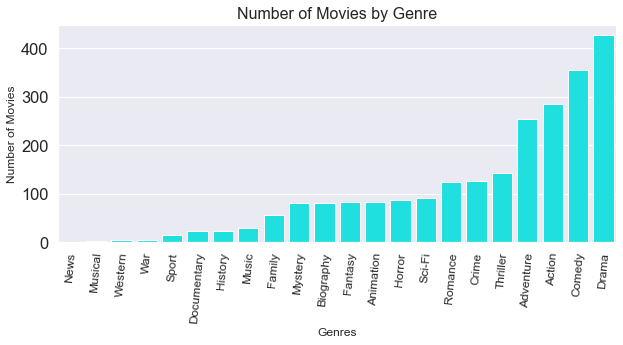

In [19]:
sns.set_style("darkgrid")
sns.set_context("notebook", font_scale=1.5)

# Most common genres
fig, ax0 = plt.subplots(figsize = ( 10 , 4 )) 
sns.barplot(x="genres",
            y="count",
            data=df_genre_count,
            color = 'cyan')

ax0.set_xlabel( "Genres" , size = 12 ) 
ax0.set_ylabel( "Number of Movies" , size = 12 ) 
ax0.set_title( "Number of Movies by Genre" , size = 16 ) 
ax0.set_xticklabels(ax0.get_xticklabels(), fontsize=12, rotation=85)
plt.show();


There are 22 unique genre types and a total 923 unique movie titles. Of this data, the top three genres are Action, Comedy, and Drama. 

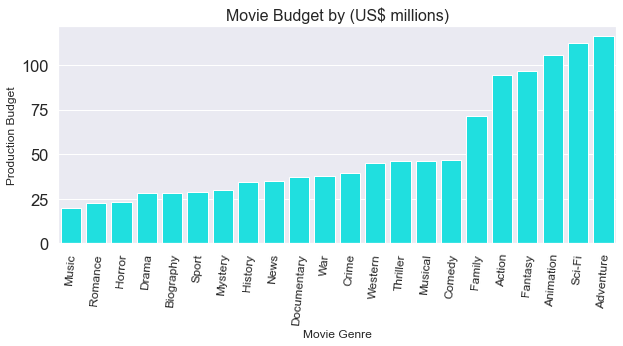

In [20]:
# # Average budget
fig, ax2 = plt.subplots(figsize = ( 10 , 4 )) 
sns.barplot(x="genres",
            y="production_budget",
            data=df_genre_budget,
            color = 'cyan')

ax2.set_xlabel( "Movie Genre" , size = 12 ) 
ax2.set_ylabel( "Production Budget" , size = 12 ) 
ax2.set_title( "Movie Budget by (US$ millions)" , size = 16 ) 
ax2.set_xticklabels(ax2.get_xticklabels(), fontsize=12, rotation=85)

plt.show();

The average budget for profitable movies is 52.07 million (US). The top three most expensive genres are Animation, Sci-Fi, and Adventure.

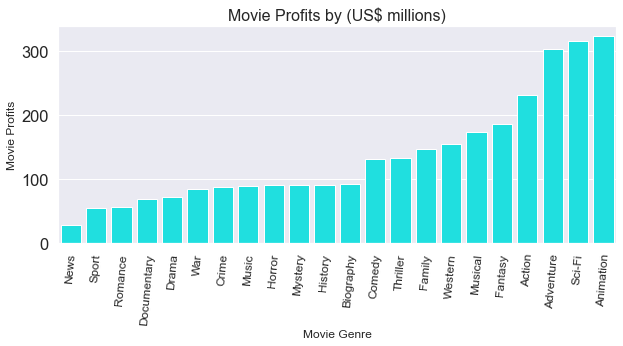

In [21]:
# # Profits
fig, ax3 = plt.subplots(figsize = ( 10 , 4 )) 
sns.barplot(x="genres",
            y="total_profits_millions",
            data=df_genre_profits,
            color = 'cyan')

ax3.set_xlabel( "Movie Genre" , size = 12 ) 
ax3.set_ylabel( "Movie Profits" , size = 12 ) 
ax3.set_title( "Movie Profits by (US$ millions)" , size = 16 ) 
ax3.set_xticklabels(ax3.get_xticklabels(), fontsize=12, rotation=85)
plt.show();

The average profit for profitable movies in this data set it 136.36 million (US). The top three genres are Adventure, Sci-Fi, and Animation.

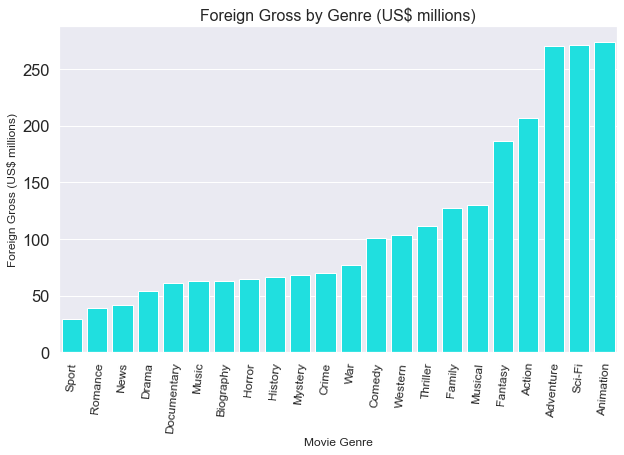

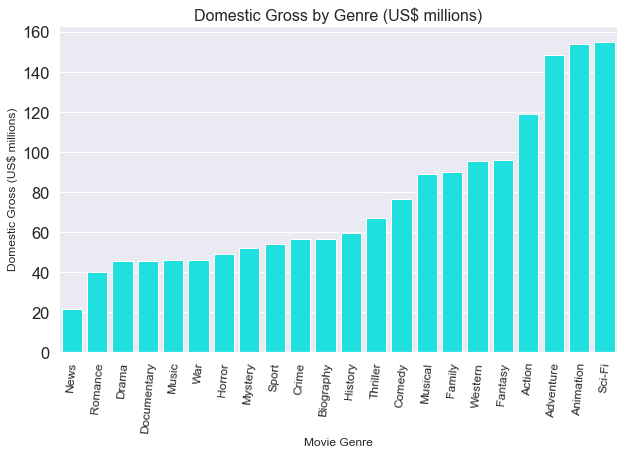

In [22]:
fig, ax4 = plt.subplots(figsize = ( 10 , 6 )) 
sns.barplot(x="genres", 
            y="foreign_gross_millions",
            data = df_genre_avg_foreign,
            color = 'cyan')

ax4.set_xlabel( "Movie Genre" , size = 12 ) 
ax4.set_ylabel( "Foreign Gross (US$ millions)" , size = 12 ) 
ax4.set_title( "Foreign Gross by Genre (US$ millions)" , size = 16 ) 
ax4.set_xticklabels(ax4.get_xticklabels(), fontsize=12, rotation=85)
plt.show();

fig, ax4 = plt.subplots(figsize = ( 10 , 6 )) 
sns.barplot(x="genres", 
            y="domestic_gross_y",
            data = df_genre_avg_domestic, 
            color = 'cyan')
ax4.set_xlabel( "Movie Genre" , size = 12 ) 
ax4.set_ylabel( "Domestic Gross (US$ millions)" , size = 12 ) 
ax4.set_title( "Domestic Gross by Genre (US$ millions)" , size = 16 ) 
ax4.set_xticklabels(ax4.get_xticklabels(), fontsize=12, rotation=85)
plt.show();

The average foreign gross for profitable movies in this data set it 112.78 million (US). The average domestic gross for profitable movies in this data set it 75.65 million (US). The top three genres are Adventure, Animation, and Sci-Fi, with Sci-Fi slightly out performing Animation in domestic markets.

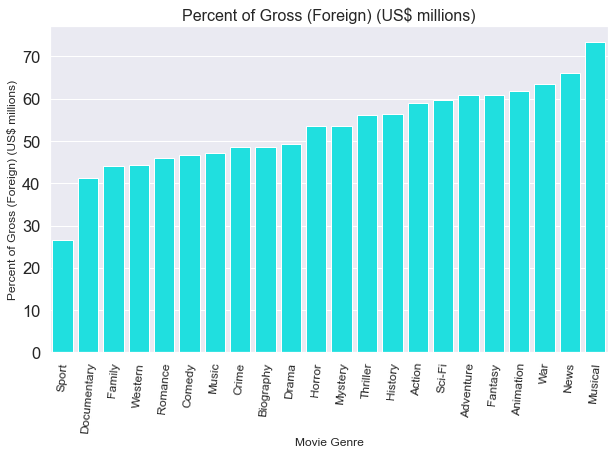

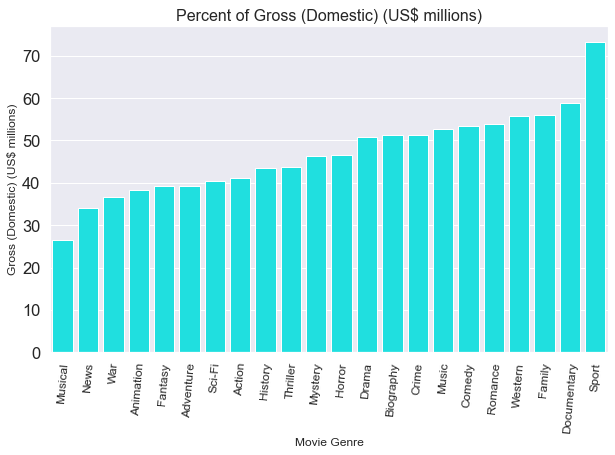

In [23]:
fig, ax5 = plt.subplots(figsize = ( 10 , 6 )) 
sns.barplot(x="genres", 
            y="foreign_percent_millions",
            data = df_genre_per_for,
            color = 'cyan')

ax5.set_xlabel( "Movie Genre" , size = 12 ) 
ax5.set_ylabel( "Percent of Gross (Foreign) (US$ millions)" , size = 12 ) 
ax5.set_title( "Percent of Gross (Foreign) (US$ millions)" , size = 16 ) 
ax5.set_xticklabels(ax5.get_xticklabels(), fontsize=12, rotation=85)
plt.show();

fig, ax6 = plt.subplots(figsize = ( 10 , 6 )) 
sns.barplot(x="genres", 
            y="domestic_percent_millions",
            data = df_genre_per_dom, 
            color = 'cyan')
ax6.set_xlabel( "Movie Genre" , size = 12 ) 
ax6.set_ylabel( "Gross (Domestic) (US$ millions)" , size = 12 ) 
ax6.set_title( "Percent of Gross (Domestic) (US$ millions)" , size = 16 ) 
ax6.set_xticklabels(ax6.get_xticklabels(), fontsize=12, rotation=85)
plt.show();

This graph also shows the makeup of generated revenue. The average revenue generated in foreign markets is 53 million (US). The average revenue generated in domestic markets is 46 million (US). In foreign markets, Animation, War, News, Musical generated the most revenue. In domestic markets, Western, Family, Documentary, and Sport generated the most revenue.

## Evaluation
This data analysis only included profitable movies from 2010-2018. I am confident that this model will helpful to Microsoft as it begins planning its entry into movie production.


## Conclusions

This data analysis supports the following recommendations for Microsoft as it prepares to produce movies: 
 
1. **Produce movies that are a combination of Sci-Fi, Animation, and or Adventure.** Few movies in the original dataset were of one genre. Most were a combination of 1-2 generes. Of those combinations, Sci-fi, Animation, and Adventure movies outperformed the other genres in terms of profitability and generated the most income domestically and internationally. Of the three, Anime is least produced and Adventure is most produced.
2. **Allocate a movie production budget of about one million US.** Sci-fi, Animation, and Adventure were the three most expensive genres to produce. They were also the three most profitable genres. 
4. **Produce movies that can be marketed both domestically and internationally.** While revenue from each genre is dispersed at varying percentages in both foreign and domestic markets, most of the revenue from those genres were generated in foriegn markets (about 60% of the gross for each genre).



Further analysis could yield different insights:
1. **Models that compare/contrast expected and actual gross data.** This could help with predicting and confirming overall profits.
2. **Models that investigate studios in order to glean best practices.** This model could help with identifying other best practices and potential partners/competitors. 


